## **Sales Data Analysis**

### Installing Required Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

#### Sales Dataset

Variables

-Date: The date the transaction occurred.

-Gender: The gender of the customer (e.g., Male or Female).

-Age: The age of the customer.

-Product Category: The category of the product purchased (e.g., Beauty, Clothing, Electronics).

-Quantity: The number of units purchased.

-Price per Unit: Price of a single unit of the product.

-Total Amount: Total amount spent for that transaction (Quantity × Price per Unit).

#### Importing Data

In [15]:
df=pd.read_csv('../dataset/raw/Sales Dataset.csv')
df.head()

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,2023-11-24,Male,34,Beauty,3,50,150
1,1,2023-02-27,Female,26,Clothing,2,500,1000
2,2,2023-01-13,Male,50,Electronics,1,30,30
3,3,2023-05-21,Male,37,Clothing,1,500,500
4,4,2023-05-06,Male,30,Beauty,2,50,100


Let's verify the column names and the data type of each variable

In [16]:
df.columns

Index(['Unnamed: 0', 'Date', 'Gender', 'Age', 'Product Category', 'Quantity',
       'Price per Unit', 'Total Amount'],
      dtype='object')

In [17]:
df.dtypes

Unnamed: 0           int64
Date                object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

#### Cleaning Data

drop column Unnamed: 0, because it is not useful 

In [18]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100


Tranform the colummn Date to datetime

In [19]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date                datetime64[ns]
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [20]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Gender            1000 non-null   object        
 2   Age               1000 non-null   int64         
 3   Product Category  1000 non-null   object        
 4   Quantity          1000 non-null   int64         
 5   Price per Unit    1000 non-null   int64         
 6   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 163.6 KB


Here we can see that the dataframe uses 163.6 kb of memory

Here we can see that there is no missing data in the data frame.

### Optimizing data

Convert columns to smaller types

In [21]:
df['Age']=df['Age'].astype('int8')
df['Quantity']=df['Quantity'].astype('int8')
df['Price per Unit']=df['Price per Unit'].astype('float32')
df['Total Amount']=df['Total Amount'].astype('float32')

Getting dummy variables

In [22]:
dummy_variables=pd.get_dummies(df['Gender'])
df=pd.concat([df,dummy_variables], axis=1)
df.drop(columns=['Gender'], inplace=True)

Change index

In [23]:
df.set_index('Date', inplace=True)
df

,Age,Product Category,Quantity,Price per Unit,Total Amount,Female,Male
Date,,,,,,,
2023-11-24,34,Beauty,3,50.0,150.0,False,True
2023-02-27,26,Clothing,2,500.0,1000.0,True,False
2023-01-13,50,Electronics,1,30.0,30.0,False,True
2023-05-21,37,Clothing,1,500.0,500.0,False,True
2023-05-06,30,Beauty,2,50.0,100.0,False,True
...,...,...,...,...,...,...,...
2023-05-16,62,Clothing,1,50.0,50.0,False,True
2023-11-17,52,Beauty,3,30.0,90.0,False,True
2023-10-29,23,Beauty,4,25.0,100.0,True,False


In [24]:
df.info(memory_usage='deep')
df.to_csv("../dataset/processed/Sales Data.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-11-24 to 2023-04-12
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   int8   
 1   Product Category  1000 non-null   object 
 2   Quantity          1000 non-null   int8   
 3   Price per Unit    1000 non-null   float32
 4   Total Amount      1000 non-null   float32
 5   Female            1000 non-null   bool   
 6   Male              1000 non-null   bool   
dtypes: bool(2), float32(2), int8(2), object(1)
memory usage: 83.4 KB


If we check the memory used again, we can see that it was reduced to 83.4 kb, which is a 49% reduction in memory.

### Display of data

Display a barplot with the total the product sales in the Online Store

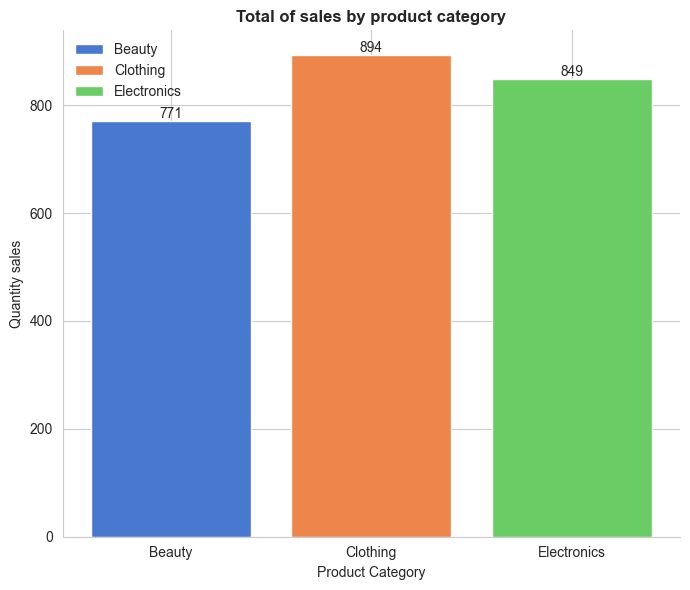

In [128]:
#group sales by category type
df_sales=df[["Product Category", 'Quantity']].groupby("Product Category").sum().reset_index()

fig, ax =plt.subplots(figsize=(7, 6))
#adding style
sns.set_style("whitegrid")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#creating a color list with the same length the dataframe
colors = sns.color_palette("muted", n_colors=len(df_sales))
#bar plot
bar=ax.bar(df_sales['Product Category'],df_sales['Quantity'],color=colors, label=df_sales['Product Category'])
#setting labels and some data for better read
ax.set_title('Total of sales by product category', fontsize=12,fontweight='bold')
ax.set_xlabel("Product Category")
ax.set_ylabel('Quantity sales')
ax.bar_label(bar)
ax.legend(loc='upper left',fontsize=10, title_fontsize=11, frameon=False)



max_index = df_sales[df_sales['Quantity']==max(df_sales['Quantity'])]


plt.tight_layout()
plt.show()

The bar chart shows the total number of products sold grouped by category. It can be seen that the Clothing category represents the highest sales volume, suggesting greater demand or turnover for this type of product compared to other categories such as Electronics or Beauty.

This information can be useful for prioritizing sales strategies, managing inventory, or even adjusting marketing campaigns focused on the most impactful categories.